## LESCO Distance-Based Evaluation

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import spatial # cosine similarity
import pandas as pd
from scipy.spatial import distance
import ast

In [2]:
# load all pre-proceesed videos.
videos = []
with open("local/videos.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        x = line[0]
        if(x != ''):
            video = [float(c) for c in x.replace('"','').replace('[','').replace(']','').replace(' ','').split(',')]
            videos.append(video)
        else:
            videos.append([])
        
labels = []
with open("labels.csv", "r") as f:
    reader = csv.reader(f, delimiter="\t")
    for i, line in enumerate(reader):
        labels = [x.replace("'","").replace('"',"") for x in line[0].split(',')]

clean_videos = []
clean_labels = []
# remove wrongly loaded videos
for vid, lab in zip(videos, labels):
    if (vid):
        clean_videos.append(vid)
        clean_labels.append(lab)
        
videos = clean_videos
labels = clean_labels

In [3]:
# test train split
X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20, random_state=43)

print("Training", len(X_train))
print("Training", len(X_test))

Training 523
Training 131


Text(0.5, 1.0, 'Fire')

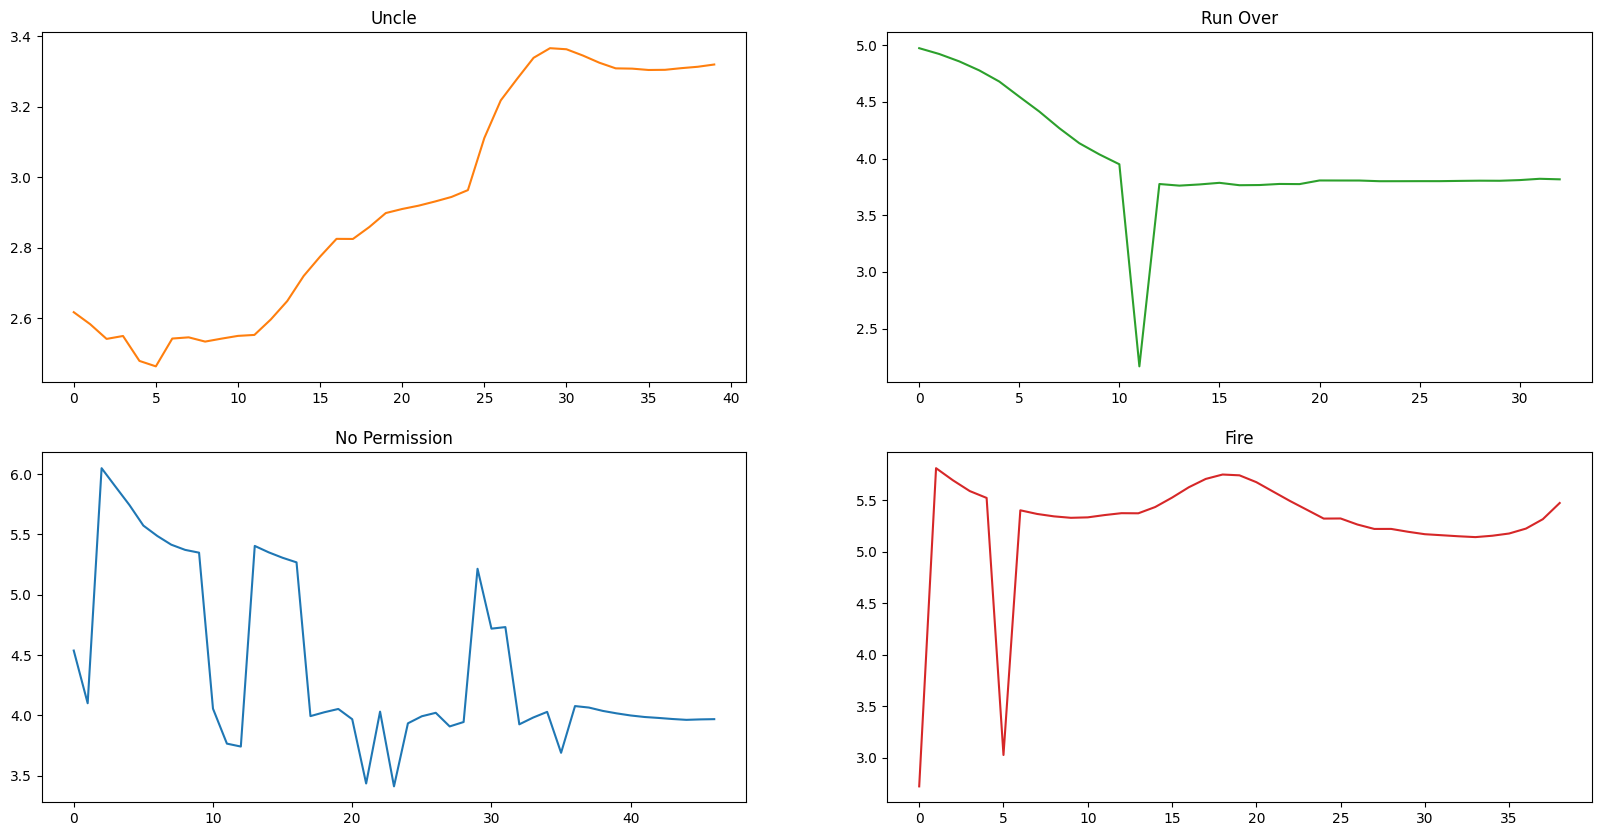

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

axs[0, 0].plot(X_train[20], 'tab:orange')
axs[0, 0].set_title("Uncle")

axs[0, 1].plot(X_train[40], 'tab:green')
axs[0, 1].set_title("Run Over")

axs[1, 0].plot(X_train[120], 'tab:blue')
axs[1, 0].set_title("No Permission")

axs[1, 1].plot(X_train[320], 'tab:red')
axs[1, 1].set_title("Fire")


## Similarity Functions

In [40]:
def get_manhattan(train_data, test_item, padding = 50):
    similarity = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - np.abs(np.array(data) - np.array(test_item)).sum()
        similarity.append(s)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"]  # returns most similar class

def get_manhattan_array(train_data, test_item, padding = 50):
    similarity = []
    arr = []
    test_item.extend([0] * (50 - len(test_item)))
    for data in train_data:
        data.extend([0] * (50 - len(data)))
        s = 1 - np.abs(np.array(data) - np.array(test_item)).sum()
        similarity.append(s)
        arr.append(data)
        
    
    df = pd.DataFrame({
        "y_train" : y_train,
        "similarity" : similarity,
        "array" : arr
    })
    
    df = df.sort_values(by=['similarity'], ascending=False)
    
    return df.iloc[0]["y_train"], df.iloc[0]["array"], df.iloc[0]["similarity"]  # returns most similar class    

## Test Set Validation

In [42]:
total = len(X_test)
count = 0

for test, label in zip(X_test, y_test):
    y_pred = get_manhattan(X_train, test)
    if (y_pred == label):
        count = count + 1

print("Manhattan Normal Fn Test Set Accuracy:", round(count/total,2))

Manhattan Normal Fn Test Set Accuracy: 0.89


## Cross Validation Manhattan
cross validation shows that Manhattan is the best similarity measure so far...

In [43]:
scores = []
for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.20)
    total = len(X_test)
    count = 0
    for test, label in zip(X_test, y_test):
        y_pred = get_manhattan(X_train, test)
        if (y_pred == label):
            count = count + 1
    scores.append(round(count/total,2))
print("Scores:", scores)
print("Manhattan Cross Validation", np.mean(scores))
    

Scores: [0.91, 0.9, 0.95, 0.97, 0.91]
Manhattan Cross Validation 0.9279999999999999


Text(0.5, 0.98, '-5.36 Similarity between talar and talar ')

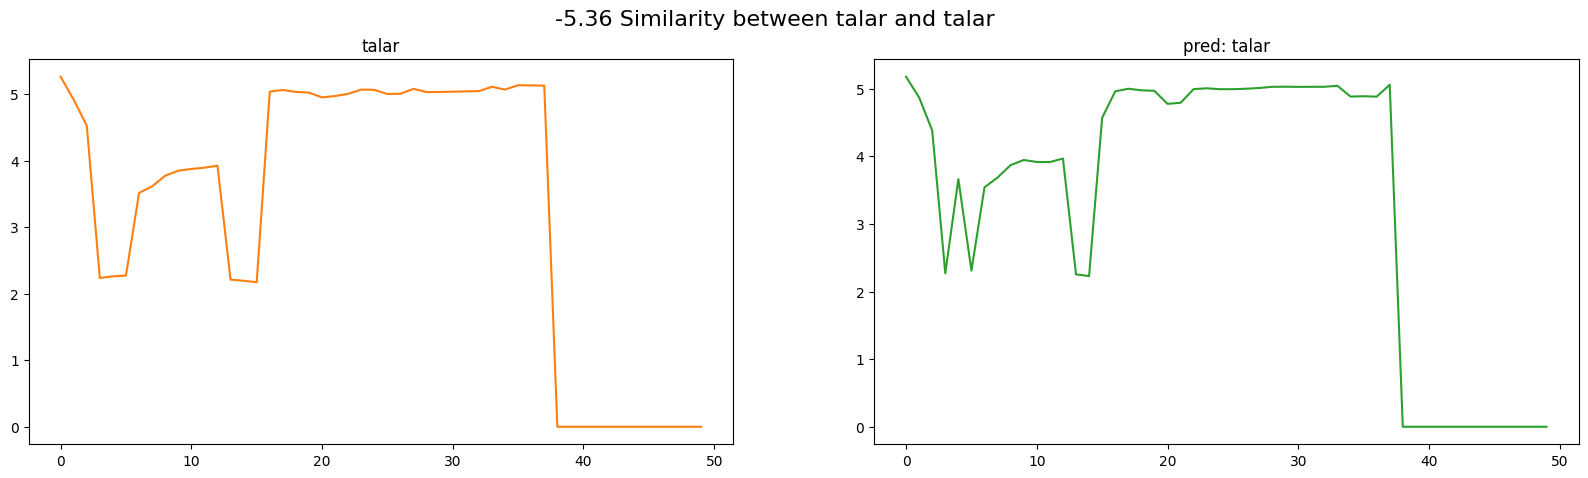

In [57]:
Xt = X_test[2]
yt = y_test[2]

cls, arr, sim = get_manhattan_array(X_train, Xt)

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].plot(Xt, 'tab:orange')
axs[0].set_title(yt)

axs[1].plot(arr, 'tab:green')
axs[1].set_title("pred: "+ cls)

fig.suptitle('{0} Similarity between {1} and {2} '.format(round(sim,2), yt, cls), fontsize=16)

In [29]:
cls

'tener'